In [1]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
from mmdet.core import DatasetEnum
import mmcv

/blue/hulcr/eric.kuo/conda/envs/CODETR_env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/blue/hulcr/eric.kuo/conda/envs/CODETR_env/lib/python3.7/site-packages/mmcv/__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  'On January 1, 2023, MMCV will release v2.0.0, in which it will remove '


In [2]:
import torch
print(torch.version.cuda)

11.3


In [9]:
config_file = '../configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
config_file = '/blue/hulcr/eric.kuo/Co-DETR/projects/configs/co_deformable_detr/co_deformable_detr_r50_1x_coco.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
# url: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
checkpoint_file = '../checkpoints/epoch_12.pth'

In [22]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, DatasetEnum.COCO, device='cuda:0')

2025-03-06 23:17:47,904 - mmcv - INFO - initialize RPNHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01}
2025-03-06 23:17:47,909 - mmcv - INFO - 
rpn_conv.weight - torch.Size([256, 256, 3, 3]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2025-03-06 23:17:47,910 - mmcv - INFO - 
rpn_conv.bias - torch.Size([256]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2025-03-06 23:17:47,910 - mmcv - INFO - 
rpn_cls.weight - torch.Size([9, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2025-03-06 23:17:47,911 - mmcv - INFO - 
rpn_cls.bias - torch.Size([9]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2025-03-06 23:17:47,911 - mmcv - INFO - 
rpn_reg.weight - torch.Size([36, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2025-03-06 23:17:47,911 - mmcv - INFO - 
rpn_reg.bias - torch.Size([36]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2025-03-06 23:17:47,987 - mmcv - INFO - initialize Shared2FCBBoxHead with init_cfg [{'type': 'Normal', 'std': 0.01, 'override': {'name': 'fc_cls'

In [27]:
# test a single image
img = '009081e7ee726ac6e4ba9545683d9d04.png'
result = inference_detector(model, img)

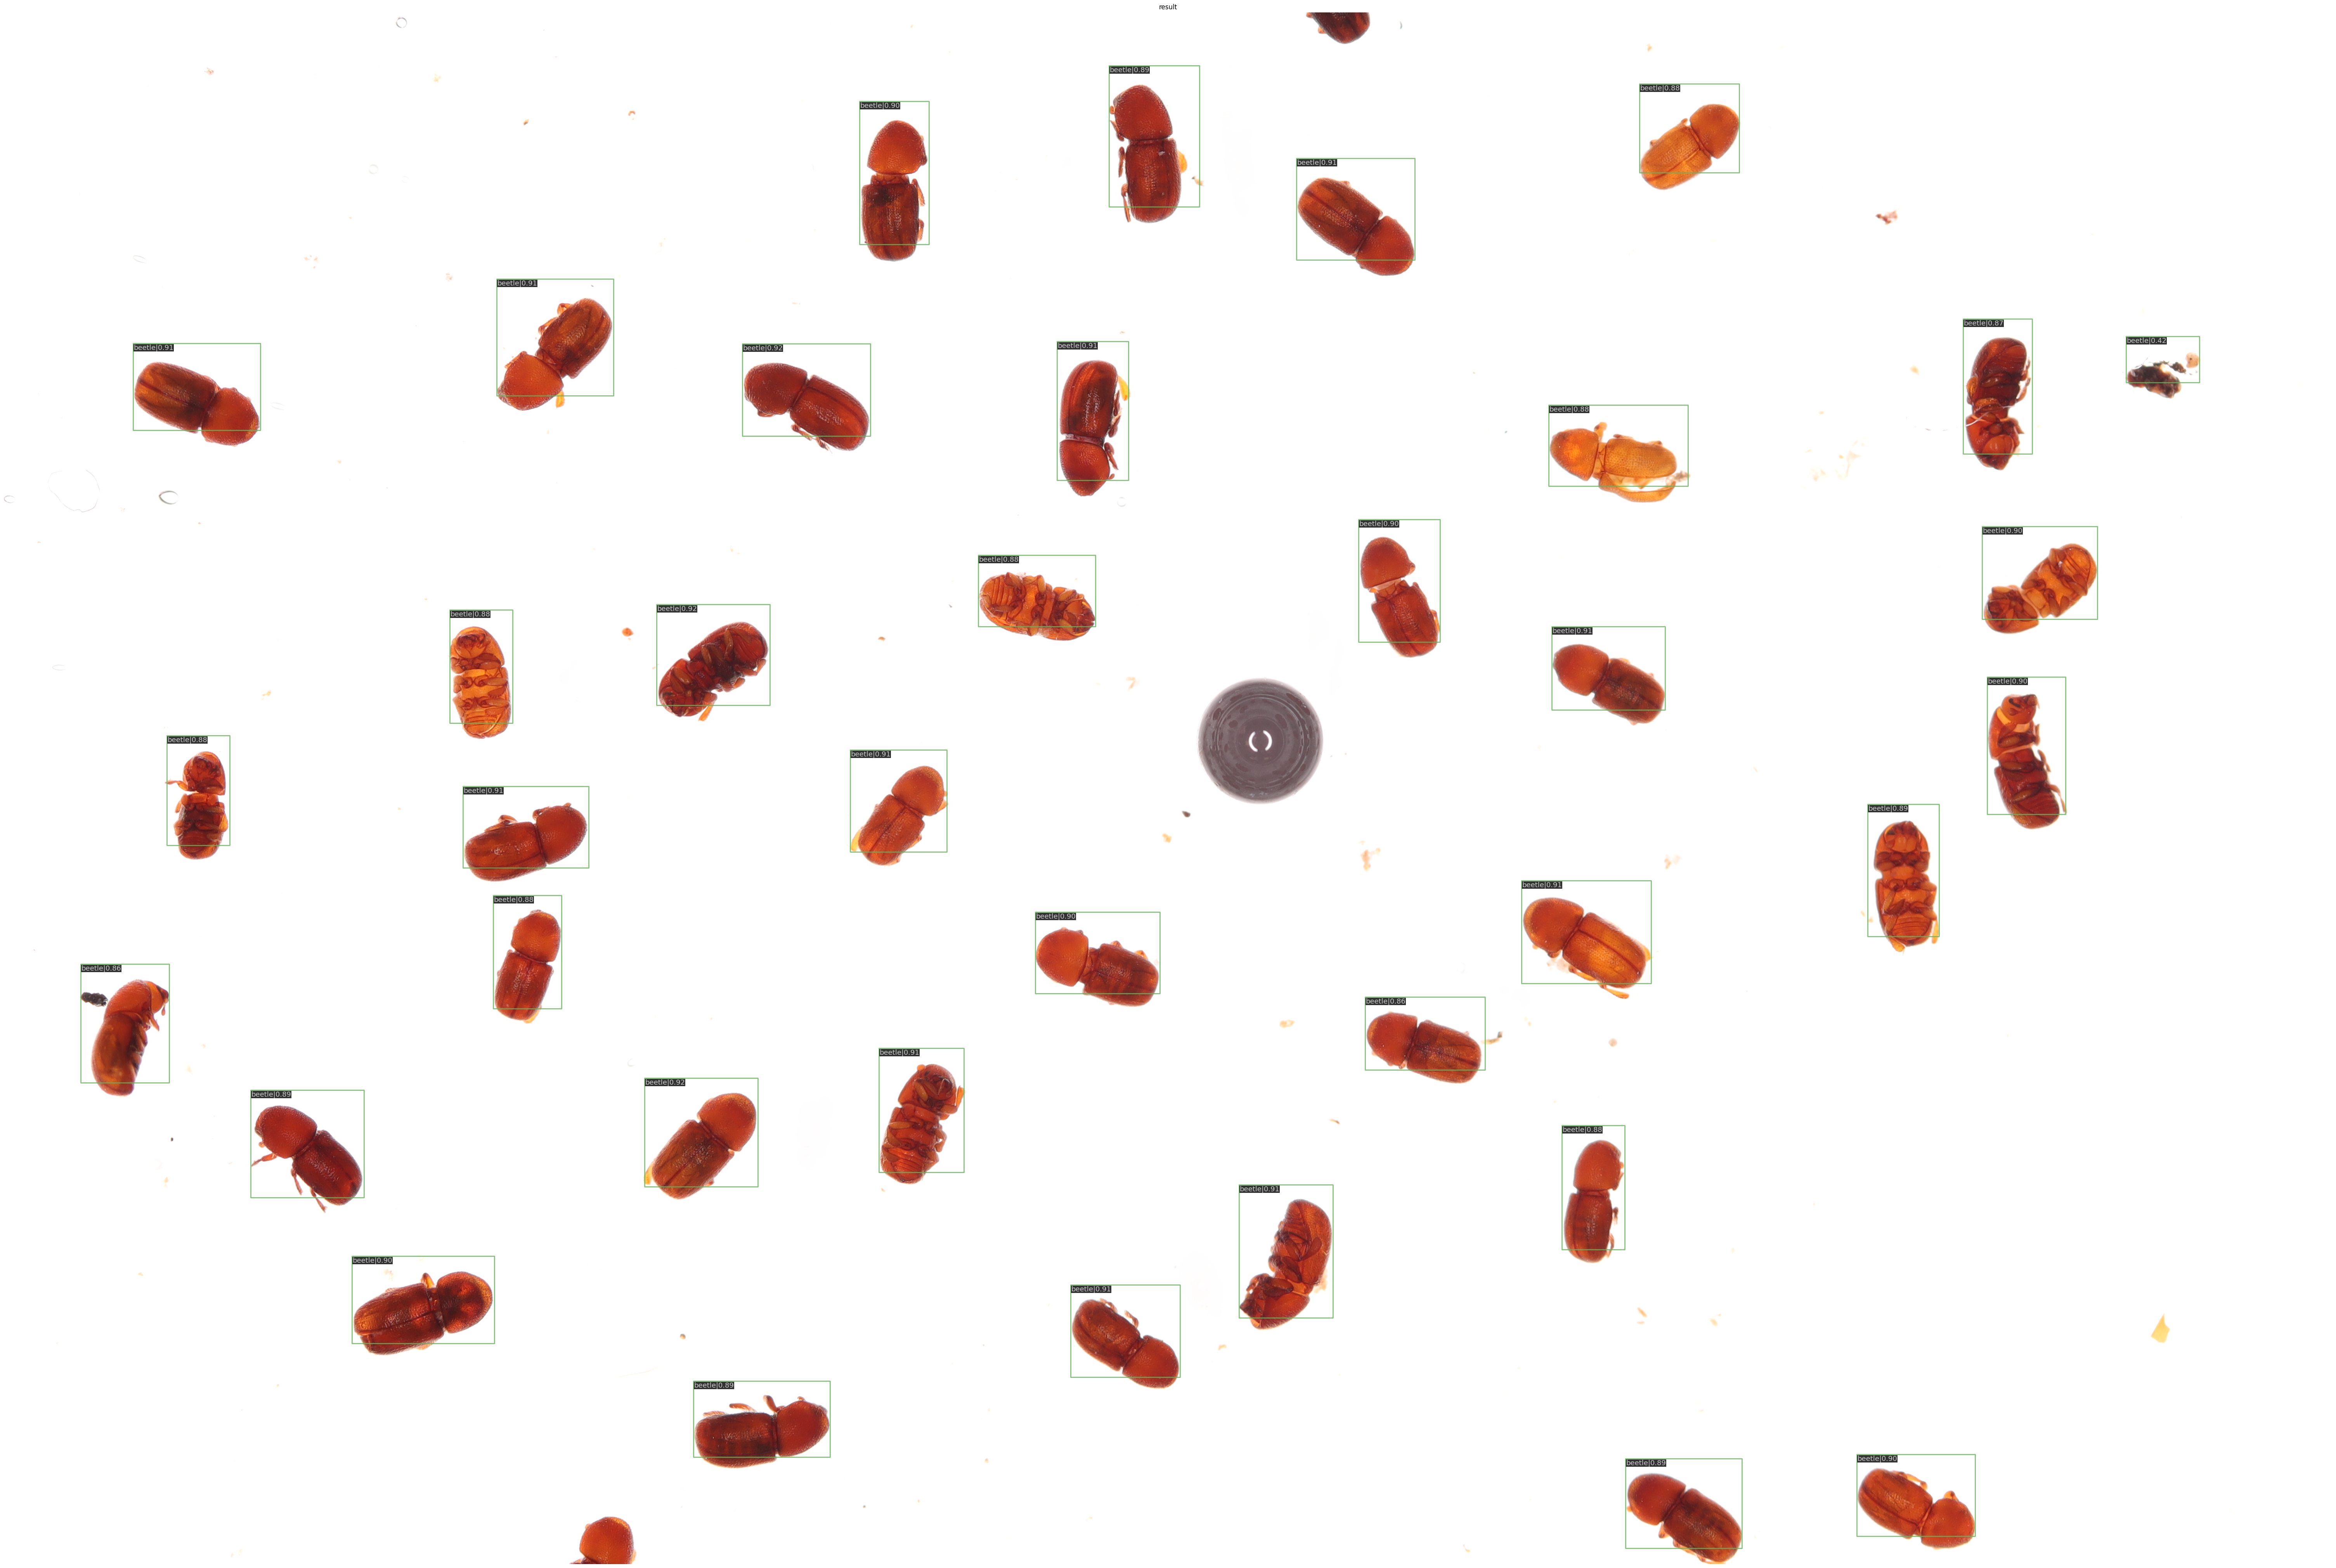

In [28]:
# show the results
show_result_pyplot(model, img, result)